In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import plotly.graph_objs as go
from scipy.stats import gaussian_kde

In [2]:
    def load_data(carpeta):
        df = {}
        for archivo in os.listdir(carpeta):
            if archivo.endswith('.csv') or archivo.endswith('.xlsx'):
                variable = os.path.splitext(archivo)[0]
                ruta = os.path.join(carpeta, archivo)
                if archivo.endswith('.csv'):
                    df[variable] = pd.read_csv(ruta)
                elif archivo.endswith('.xlsx'):
                    # Leer todas las hojas del archivo Excel
                    xls = pd.ExcelFile(ruta)
                    for sheet_name in xls.sheet_names:
                        # Crear un nombre único para cada hoja/variable
                        variable_hoja = f"{variable}_{sheet_name}"
                        df[variable_hoja] = pd.read_excel(ruta, sheet_name=sheet_name)
        return df

    carpeta_ruta = "C:/Users/franc/OneDrive - INTEC/Escritorio/Proyecto ARS/Bases de datos/BD FINAL"
    df = load_data(carpeta_ruta)

    def asignar_dfs_a_variables_globales(df):
        for clave, df in df.items():
            # Establece cada DataFrame en el diccionario como una variable global
            globals()[clave] = df
            
    asignar_dfs_a_variables_globales(df)



Analisi Sobre Afiliados


In [3]:
lista_Afiliados_1

,Región Geográfica/3,Región Salud,Provincia,Fecha,Afiliados C,Afiliados NO C,Dependencia por tirular
0,Región Distrito Nacional,0 - Santo Domingo,DISTRITO NACIONAL,200709,284414,181566,1.566450
1,Región Distrito Nacional,0 - Santo Domingo,MONTE PLATA,200709,4006,2568,1.559969
2,Región Distrito Nacional,0 - Santo Domingo,SANTO DOMINGO,200709,46438,20292,2.288488
3,Región Este,V - Este,El SEIBO,200709,2467,1285,1.919844
4,Región Este,V - Este,HATO MAYOR DEL REY,200709,3183,1589,2.003147
...,...,...,...,...,...,...,...
6463,Región Sur,IV - Enriquillo,PEDERNALES,202312,4752,2789,1.703837
6464,Región Sur,VI - El Valle,AZUA,202312,39776,41887,0.949603
6465,Región Sur,VI - El Valle,ELIAS PIÑA,202312,21226,9016,2.354259
6466,Región Sur,VI - El Valle,SAN JUAN DE LA MAGUANA,202312,69502,43616,1.593498


In [4]:
lista_Afiliados_1['Fecha'] = pd.to_datetime(lista_Afiliados_1['Fecha'], format='%Y%m')

# Ordenar el DataFrame por 'Fecha'
lista_Afiliados_1.sort_values('Fecha', inplace=True)

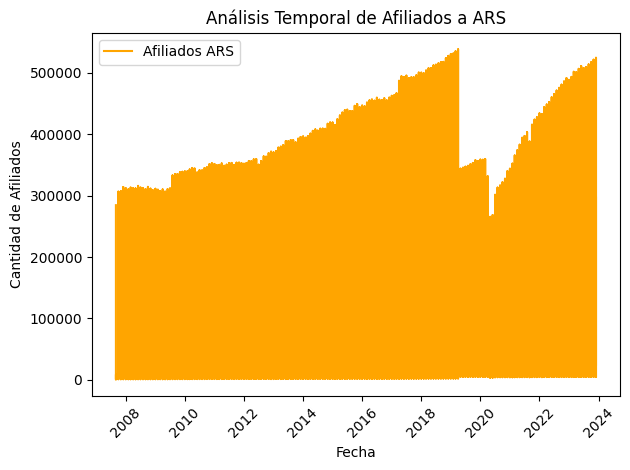

In [5]:

# Graficar la cantidad de afiliados. Cambia 'Afiliados C' por el nombre correcto de tu columna si es necesario.
plt.plot(lista_Afiliados_1['Fecha'], lista_Afiliados_1['Afiliados C'], label='Afiliados ARS', color='orange')

# Configuración de los títulos y etiquetas del gráfico
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Afiliados')
plt.title('Análisis Temporal de Afiliados a ARS')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


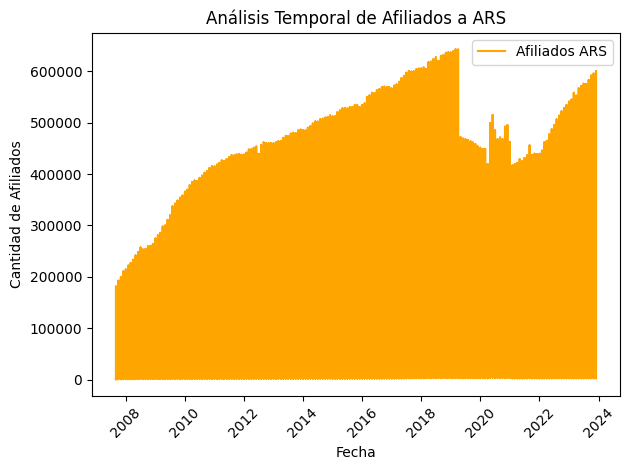

In [6]:
# Graficar la cantidad de afiliados. Cambia 'Afiliados C' por el nombre correcto de tu columna si es necesario.
plt.plot(lista_Afiliados_1['Fecha'], lista_Afiliados_1['Afiliados NO C'], label='Afiliados ARS', color='orange')

# Configuración de los títulos y etiquetas del gráfico
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Afiliados')
plt.title('Análisis Temporal de Afiliados a ARS')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


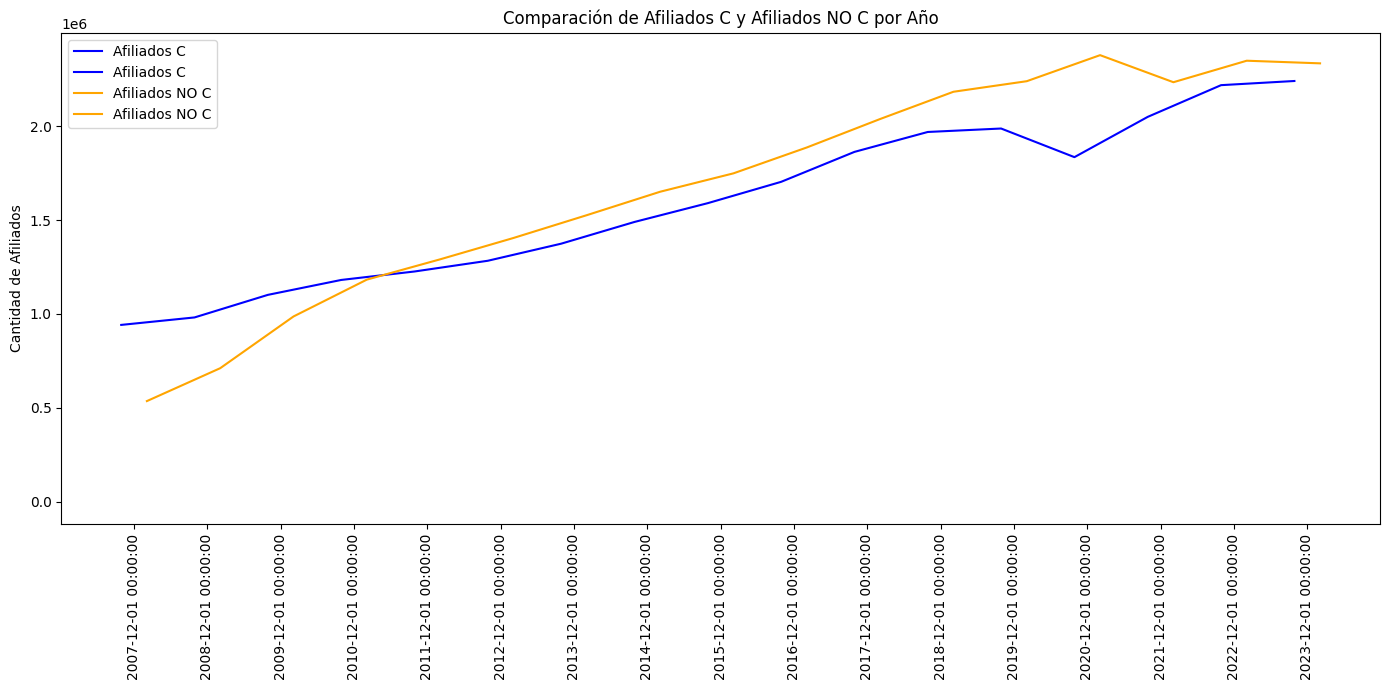

In [7]:
# Agrupar por año y sumar los afiliados C y NO C
afiliados2 = lista_Afiliados_1[lista_Afiliados_1["Fecha"].dt.month == 12]
afiliados_c_por_año = afiliados2.groupby('Fecha')['Afiliados C'].sum()
afiliados_no_c_por_año = afiliados2.groupby('Fecha')['Afiliados NO C'].sum()

# Configurar las posiciones de las barras
ancho = 0.35  # ancho de las barras
ind = np.arange(len(afiliados_c_por_año))  # las ubicaciones x para los grupos

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
barras_c = plt.plot(ind - ancho/2, afiliados_c_por_año, ancho, label='Afiliados C', color='blue')
barras_no_c = plt.plot(ind + ancho/2, afiliados_no_c_por_año, ancho, label='Afiliados NO C', color='orange')

# Etiquetas, títulos y configuración del gráfico
plt.ylabel('Cantidad de Afiliados')
plt.title('Comparación de Afiliados C y Afiliados NO C por Año')
plt.xticks(ind, afiliados_c_por_año.index, rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Afiliados Contitutivos por edad (Esto incluye a los dependientes no directos)

In [8]:
Afiliados_Por_Edad_1

,Fecha,Sexo,Edad,Afiliados C,Afiliados NO C
0,200709,Hombre,19 o menos,9157.0,42736.0
1,200710,Hombre,19 o menos,9846.0,46255.0
2,200711,Hombre,19 o menos,9796.0,48181.0
3,200712,Hombre,19 o menos,10666.0,50791.0
4,200801,Hombre,19 o menos,9854.0,51163.0
...,...,...,...,...,...
6282,202308,Mujer,No Especificada,0.0,18093.0
6283,202309,Mujer,No Especificada,0.0,18158.0
6284,202310,Mujer,No Especificada,0.0,18237.0
6285,202311,Mujer,No Especificada,0.0,18295.0


C:\Users\franc\AppData\Local\Temp\ipykernel_12304\2057402888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Afiliados_Por_Edad_1['Fecha'] = pd.to_datetime(Afiliados_Por_Edad_1['Fecha'], format='%Y%m', errors='coerce')
C:\Users\franc\AppData\Local\Temp\ipykernel_12304\2057402888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Afiliados_Por_Edad_1.dropna(subset=['Fecha'], inplace=True)
C:\Users\franc\AppData\Local\Temp\ipykernel_12304\2057402888.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

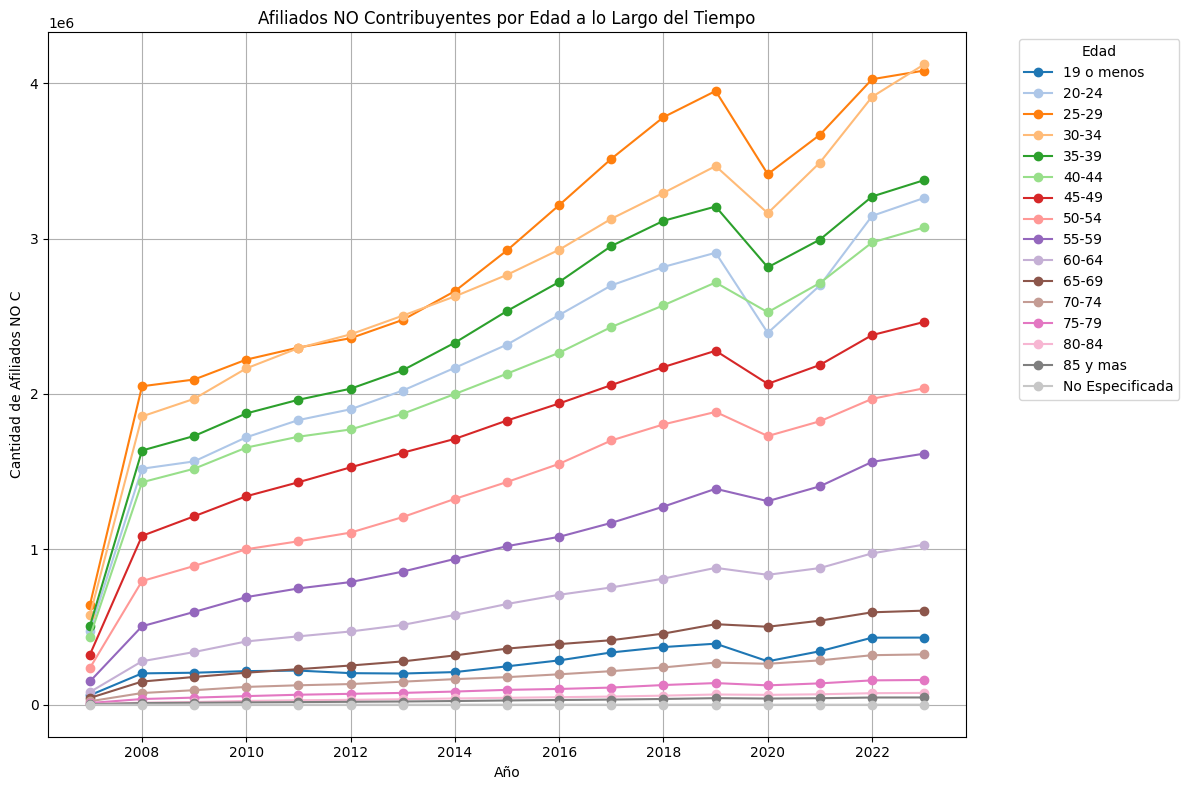

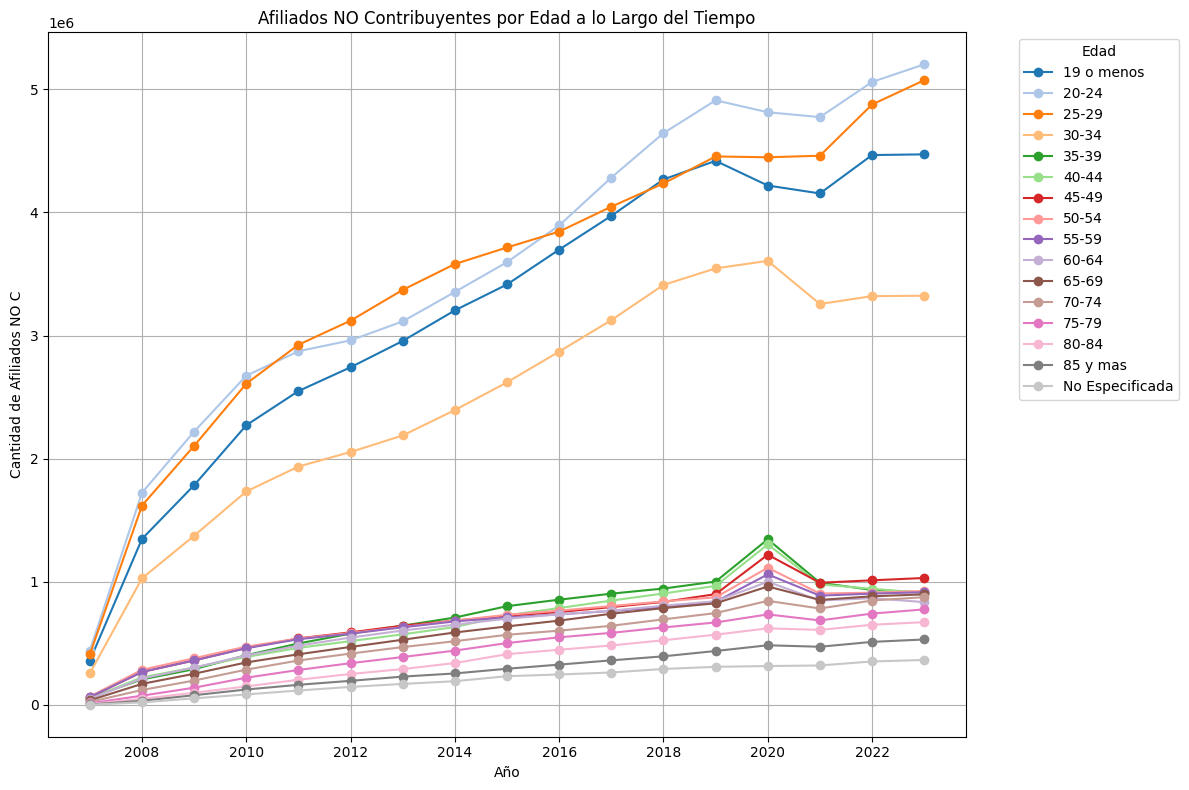

In [9]:
# Asegurarse de que 'Fecha' es un tipo datetime
is_numeric_fecha = pd.to_numeric(Afiliados_Por_Edad_1['Fecha'], errors='coerce').notnull()
Afiliados_Por_Edad_1 = Afiliados_Por_Edad_1[is_numeric_fecha]

# Ahora, intentamos convertir la columna 'Fecha' a datetime nuevamente.
Afiliados_Por_Edad_1['Fecha'] = pd.to_datetime(Afiliados_Por_Edad_1['Fecha'], format='%Y%m', errors='coerce')

# Eliminamos las filas donde la 'Fecha' es NaT (Not a Time) después de la conversión.
Afiliados_Por_Edad_1.dropna(subset=['Fecha'], inplace=True)

# Continúa con el análisis agregando la columna 'Año' y luego el agrupamiento.
Afiliados_Por_Edad_1['Año'] = Afiliados_Por_Edad_1['Fecha'].dt.year


# Análisis temporal por edad para 'Afiliados C'
afiliados_por_edad_no_c = Afiliados_Por_Edad_1.groupby(['Año', 'Edad'])['Afiliados C'].sum().unstack()
colores_no_c = sns.color_palette("tab20", len(afiliados_por_edad_no_c.columns))




# Graficar 'Afiliados NO C'
afiliados_por_edad_no_c.plot(kind='line', color=colores_no_c, marker='o', figsize=(12, 8))
plt.title('Afiliados NO Contribuyentes por Edad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Afiliados NO C')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



# Análisis temporal por edad para 'Afiliados NO C'
afiliados_por_edad_no_c = Afiliados_Por_Edad_1.groupby(['Año', 'Edad'])['Afiliados NO C'].sum().unstack()
colores_no_c = sns.color_palette("tab20", len(afiliados_por_edad_no_c.columns))

# Graficar 'Afiliados NO C'
afiliados_por_edad_no_c.plot(kind='line', color=colores_no_c, marker='o', figsize=(12, 8))
plt.title('Afiliados NO Contribuyentes por Edad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Afiliados NO C')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

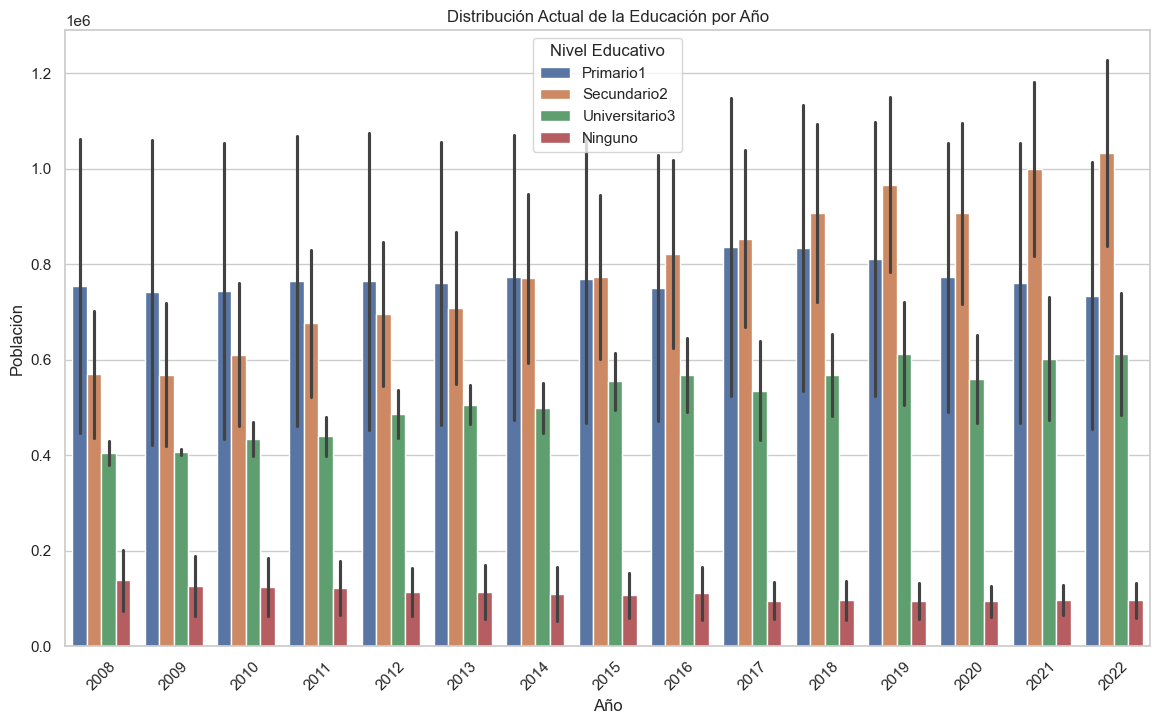

In [10]:
# Y luego, usaríamos Seaborn para hacer el gráfico:
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras usando 'hue' para separar los niveles educativos
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=Poblacion_Empleado_Educacion, 
    x='Año', 
    y='Poblacion', 
    hue='Nivel educativo'
)

plt.title('Distribución Actual de la Educación por Año')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend(title='Nivel Educativo')
plt.xticks(rotation=45)

plt.show()

In [11]:
Poblacion_Igresos_Establecimiento

,Unnamed: 0,Años,Tipo,Poblacion,Sexo
0,0,2008,Privado,64.744937,Hombre
1,1,2009,Privado,70.284613,Hombre
2,2,2010,Privado,73.266658,Hombre
3,3,2011,Privado,79.088464,Hombre
4,4,2012,Privado,79.242776,Hombre
...,...,...,...,...,...
85,85,2018,Zona Franca,69.447582,Mujer
86,86,2019,Zona Franca,78.489899,Mujer
87,87,2020,Zona Franca,66.847106,Mujer
88,88,2021,Zona Franca,82.563625,Mujer


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

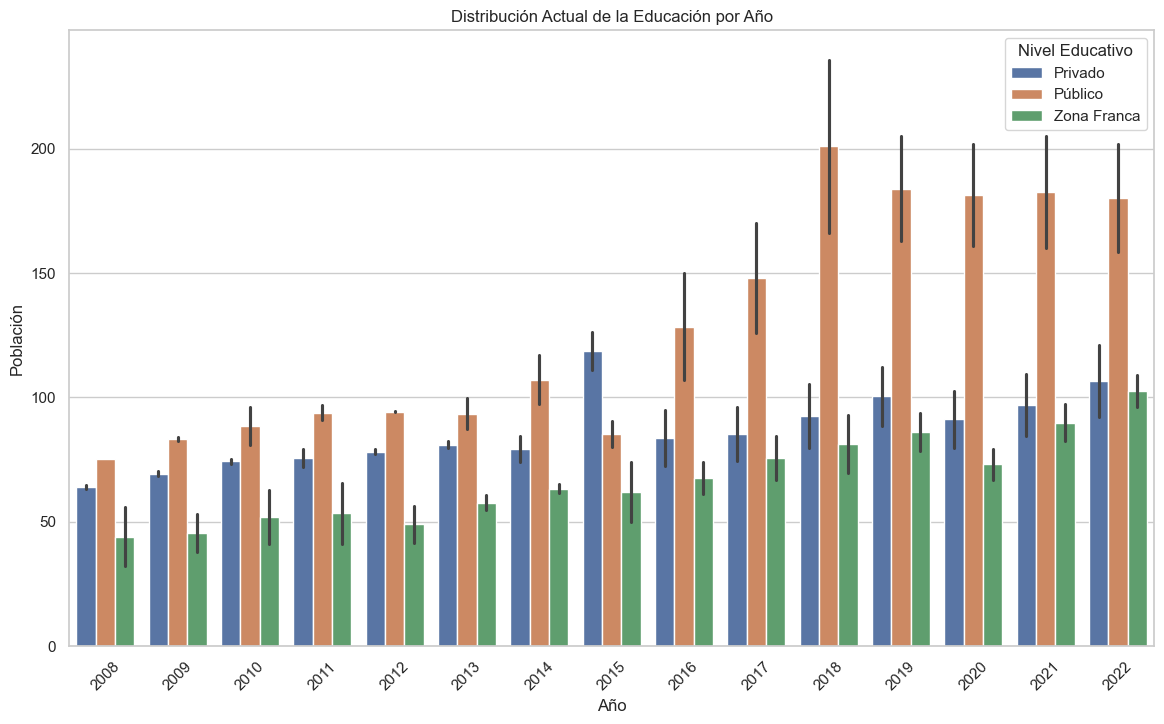

In [12]:
# Y luego, usaríamos Seaborn para hacer el gráfico:
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras usando 'hue' para separar los niveles educativos
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=Poblacion_Igresos_Establecimiento, 
    x='Años', 
    y='Poblacion', 
    hue='Tipo'
)

plt.title('Distribución Actual de la Educación por Año')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend(title='Nivel Educativo')
plt.xticks(rotation=45)

plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_12304\4067009996.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_temporal, x='Tipo', y='Poblacion', marker='o', linestyle='-', label=indicador, palette='tab20')
C:\Users\franc\AppData\Local\Temp\ipykernel_12304\4067009996.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_temporal, x='Tipo', y='Poblacion', marker='o', linestyle='-', label=indicador, palette='tab20')
C:\Users\franc\AppData\Local\Temp\ipykernel_12304\4067009996.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_temporal, x='Tipo', y='Poblacion', marker='o', linestyle='-', label=indicador, palette='tab20')
C:\Users\franc\AppData\Local\Temp\ipykernel_12304\4067009996.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_temporal, x='Tipo', y='Poblacion', marke

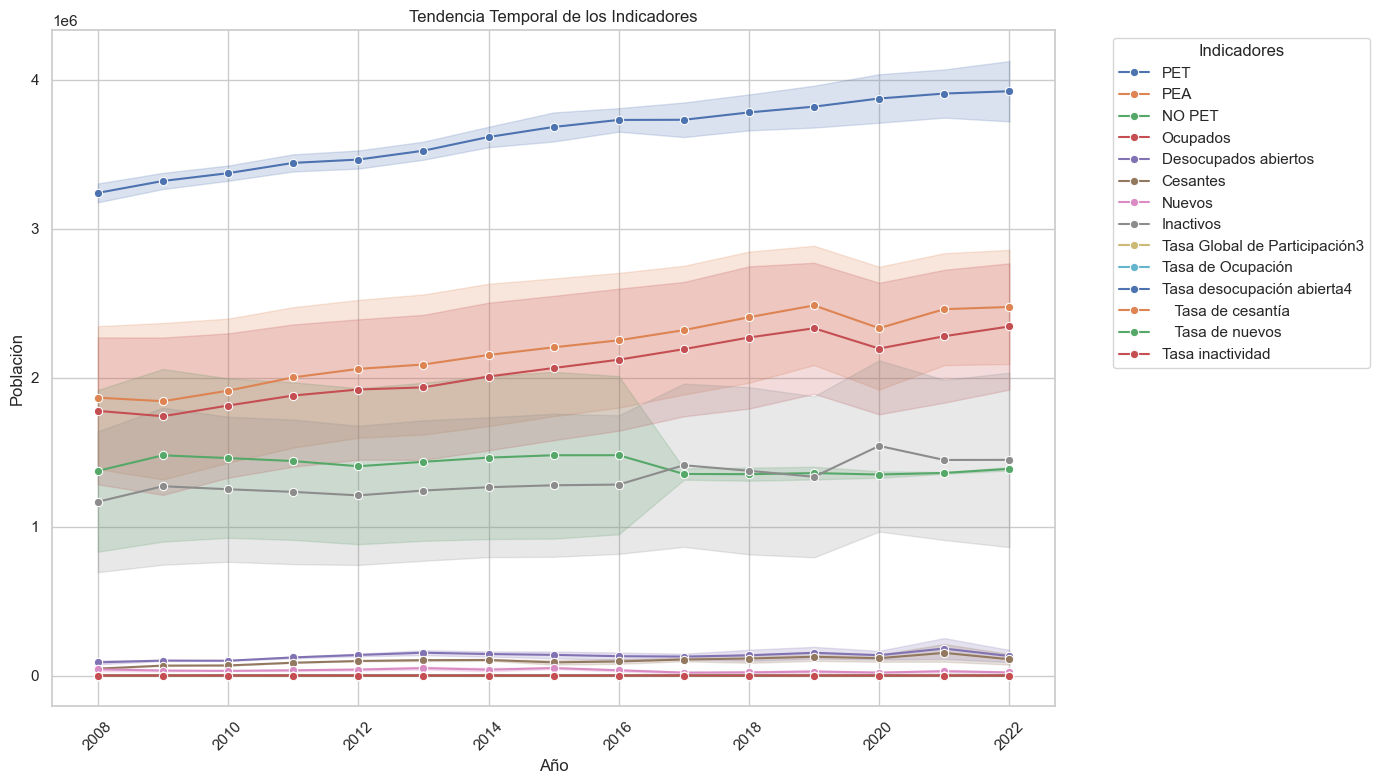

In [13]:
# Conversión de tipos de datos, si es necesario
Poblacion_Indicadores['Poblacion'] = pd.to_numeric(Poblacion_Indicadores['Poblacion'], errors='coerce')

# Crear un solo gráfico de líneas con Seaborn para cada indicador
plt.figure(figsize=(14, 8))

# Iterar sobre cada indicador único y dibujar un gráfico para cada uno
for indicador in Poblacion_Indicadores['Indicadores'].unique():
    df_temporal = Poblacion_Indicadores[Poblacion_Indicadores['Indicadores'] == indicador]
    sns.lineplot(data=df_temporal, x='Tipo', y='Poblacion', marker='o', linestyle='-', label=indicador, palette='tab20')

plt.title('Tendencia Temporal de los Indicadores')
plt.xlabel('Año')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend(title='Indicadores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
Finanzas_1

,Periodo,Gasto en Salud,Total capitas,Titulares,Dependientes Directos,Dependientes Adicionales,Ingresos en Salud,Titulares.1,Dependientes Directos.1,Dependientes Adicionales.1,Monto per Capita,Siniestralidad
0,200709,2.934182e+08,1207909,786177,419106,2626,5.838187e+08,3.799829e+08,2.025665e+08,1.269225e+06,483.330000,50.258457
1,200710,3.809709e+08,1534269,955329,576040,2900,7.415582e+08,4.617392e+08,2.784174e+08,1.401657e+06,483.330000,51.374377
2,200711,5.681702e+08,1360641,851660,507515,1466,6.576386e+08,4.116328e+08,2.452972e+08,7.085618e+05,483.330000,86.395499
3,200712,4.772080e+08,1599467,1005990,586713,6764,7.730704e+08,4.862251e+08,2.835760e+08,3.269244e+06,483.330000,61.728919
4,200801,5.778195e+08,1511121,936466,569690,4965,9.333933e+08,5.780082e+08,3.523082e+08,3.076797e+06,617.682675,61.905261
...,...,...,...,...,...,...,...,...,...,...,...,...
190,202307,6.652869e+09,4652895,2126933,2275635,250327,7.235013e+09,3.307342e+09,3.538386e+09,3.892843e+08,1554.948715,91.953792
191,202308,6.168124e+09,4643328,2124770,2267364,251194,7.220555e+09,3.304143e+09,3.525775e+09,3.906368e+08,1555.038655,85.424517
192,202309,7.477738e+09,4652645,2126042,2274513,252090,7.235013e+09,3.306088e+09,3.536896e+09,3.920298e+08,1555.032351,103.354864
193,202310,6.966769e+09,4672810,2134779,2286062,251969,7.266053e+09,3.319645e+09,3.554565e+09,3.918432e+08,1554.964345,95.881067


In [15]:
Finanzas_1.dtypes

Periodo                         int64
Gasto en Salud                float64
Total capitas                   int64
Titulares                       int64
Dependientes Directos           int64
Dependientes Adicionales        int64
Ingresos en Salud             float64
Titulares.1                   float64
Dependientes Directos.1       float64
Dependientes Adicionales.1    float64
Monto per Capita              float64
Siniestralidad                float64
dtype: object

<Figure size 1800x1000 with 0 Axes>

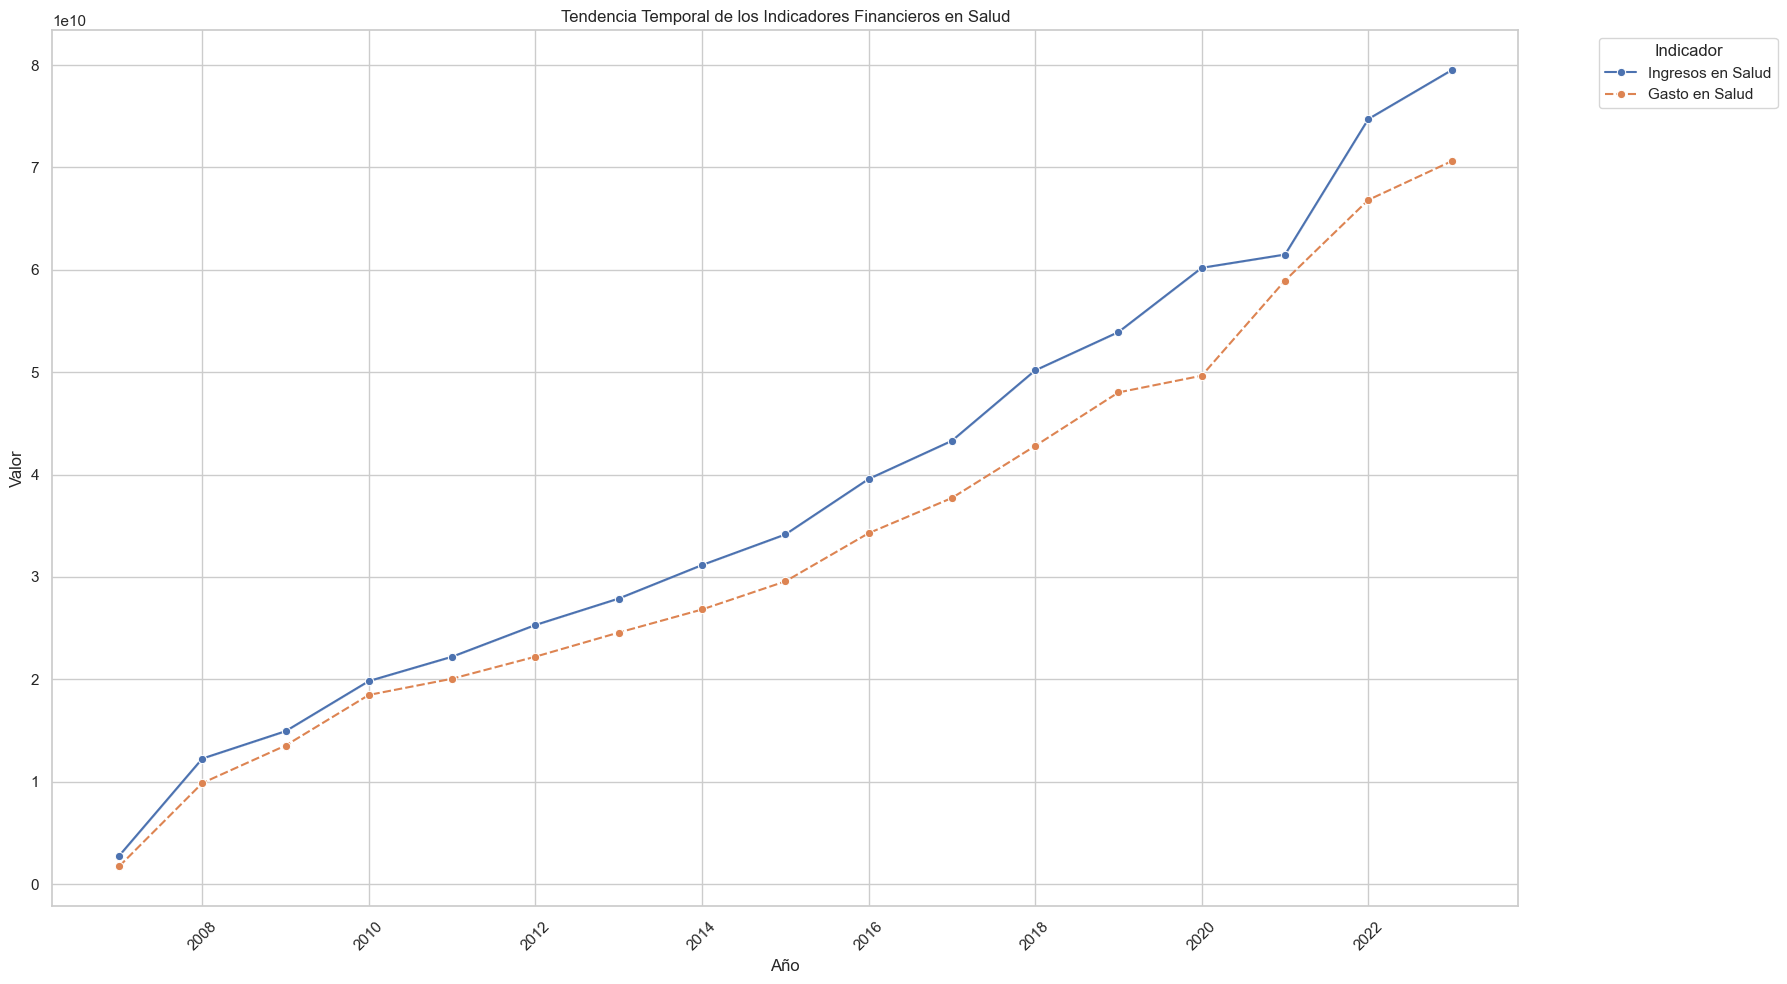

In [17]:

# Ahora, intentamos convertir la columna 'Fecha' a datetime nuevamente.
Finanzas_1['Fecha'] = pd.to_datetime(Finanzas_1['Periodo'], format='%Y%m', errors='coerce')

Finanzas_1['Fecha'] = Finanzas_1['Fecha'].dt.year

Finanzas_2 = Finanzas_1.groupby('Fecha')[['Ingresos en Salud', 'Gasto en Salud', 'Ingresos en Salud']].sum().reset_index()


# Crear un gráfico de líneas con Seaborn para el indicador 'Total'
plt.figure(figsize=(18, 10))


# Convertir el DataFrame de forma ancha a larga
Finanzas_2_melted = Finanzas_2.melt(id_vars=['Fecha'], value_vars=['Ingresos en Salud', 'Gasto en Salud', 'Ingresos en Salud'],
                                    var_name='Categoría', value_name='Valor')

# Crear el gráfico de líneas con Seaborn para mostrar 'Ingresos en Salud', 'Gasto en Salud' y 'Total'
plt.figure(figsize=(18, 10))
sns.lineplot(data=Finanzas_2_melted, x='Fecha', y='Valor', hue='Categoría', marker='o', style='Categoría')

plt.title('Tendencia Temporal de los Indicadores Financieros en Salud')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Indicador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Poblacion no afiliada 

In [18]:
Poblacion_Ocupacion

,Unnamed: 0,Ocupacion,Año,Poblacion,Sexo
0,1,Patrono o socio activo,2008,123676.0,Hombre
1,2,Cuenta propia,2008,1067294.0,Hombre
2,3,Empleado del estado,2008,221409.0,Hombre
3,4,Empleado privado,2008,857743.0,Hombre
4,5,Familiar no remunerado,2008,46616.0,Hombre
...,...,...,...,...,...
187,217,Cuenta propia,2023,543044.0,Mujer
188,218,Empleado del estado,2023,396175.0,Mujer
189,219,Empleado privado,2023,1150466.0,Mujer
190,220,Familiar no remunerado,2023,44983.0,Mujer


In [19]:
Afiliados = 2219339

Total = 2854431

Pop_No_2022 = Total - Afiliados

print(f"Total de empleados que evaden el regimen contibutivo: {Pop_No_2022}")

display(TSS_2022)


Total de empleados que evaden el regimen contibutivo: 635092


,Rango Salarial,Poblacion
0,"Menos de RD$5,000",13172
1,"De RD$5,000 a RD$10,000",199255
2,"De RD$10,000 a RD$15,000",577944
3,"De RD$15,000 a RD$30,000",849295
4,"De RD$30,000 a RD$50,000",265327
5,"Más de RD$50,000",314346


In [20]:
print(TSS_2022.dtypes)

Rango Salarial    object
Poblacion          int64
dtype: object


In [21]:
TSS_2022['Poblacion'] = TSS_2022['Poblacion'].astype(float)

# Generamos una muestra ponderada para la estimación de la densidad kernel
sample = np.repeat(TSS_2022['Rango Salarial'], TSS_2022['Poblacion'])

# Estimamos la densidad kernel
kde = gaussian_kde(sample)

# Creamos un rango de valores para el salario sobre el cual calcular la densidad
salary_values = np.linspace(0, 60000, 1000)
density = kde(salary_values)

# Visualizamos la estimación de densidad kernel
plt.figure(figsize=(10, 6))
plt.plot(salary_values, density, label='Estimación de Densidad Kernel')
plt.fill_between(salary_values, density, where=(salary_values >= 15000) & (salary_values <= 30000), 
                 color='green', alpha=0.5, label='Rango RD$15,000 a RD$30,000')
plt.title('Estimación de la Densidad de la Distribución Salarial')
plt.xlabel('Salario (RD$)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# Calculamos la probabilidad de que un salario caiga entre RD$15,000 y RD$30,000
prob_15k_to_30k = kde.integrate_box_1d(15000, 30000)
print("La probabilidad de que un salario caiga entre RD$15,000 y RD$30,000 es:", prob_15k_to_30k)

TypeError: can't multiply sequence by non-int of type 'float'

In [23]:
IPC_IPC


,Fecha,Alimentos y Bebidas no Alcohólicas,Alimentos y Bebidas no Alcohólicas %,Bebidas Alcohólicas y Tabaco,Bebidas Alcohólicas y Tabaco %,Prendas de Vestir y Calzado,Prendas de Vestir y Calzado%,Vivienda,Vivienda %,Muebles,...,Comunicaciones,Comunicaciones %,Recreación y Cultura,Recreación y Cultura %,Educación,Educación %,Restaurantes y Hoteles,Restaurantes y Hoteles %,Bienes y Servicios Diversos,Bienes y Servicios Diversos %
0,201001,95.276965,0.545605,96.676348,1.560970,95.798841,0.468293,92.186338,1.319205,97.856838,...,98.229729,0.000000,96.787149,-0.045602,92.222861,0.481681,99.479048,-1.580827,95.348996,0.180518
1,201002,96.172944,0.940394,98.662504,2.054439,96.198691,0.417385,92.361517,0.190028,97.986408,...,98.229729,0.000000,97.064168,0.286214,92.222861,0.000000,99.522876,0.044058,95.677461,0.344487
2,201003,97.191807,1.059407,98.927519,0.268607,96.526634,0.340902,92.464927,0.111962,98.199063,...,98.073664,-0.158877,97.017048,-0.048545,92.222861,0.000000,99.301438,-0.222499,95.957349,0.292533
3,201004,97.340328,0.152813,98.453038,-0.479625,96.735288,0.216161,92.463696,-0.001331,98.286735,...,98.073664,0.000000,97.215838,0.204902,92.222861,0.000000,99.920214,0.623129,96.250889,0.305907
4,201005,97.409451,0.071011,99.120686,0.678139,97.212442,0.493258,92.755831,0.315946,98.364775,...,98.073664,0.000000,97.474887,0.266468,93.439136,1.318843,99.775816,-0.144513,96.542892,0.303377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,202308,134.932300,1.271330,125.077100,0.114540,100.320800,-0.147608,120.818100,0.221815,119.240000,...,94.990300,0.015162,111.516800,0.454997,114.092800,1.807305,130.140000,0.228892,127.598100,0.245038
164,202309,136.370300,1.065720,125.231500,0.123444,100.299700,-0.021033,120.897000,0.065305,119.373900,...,94.904600,-0.090220,111.173400,-0.307936,116.847100,2.414087,130.807000,0.512525,128.125100,0.413016
165,202310,136.520000,0.110000,125.380000,0.120000,100.160000,-0.140000,120.960000,0.060000,119.620000,...,94.850000,-0.060000,111.310000,0.120000,116.850000,0.000000,131.270000,0.350000,128.670000,0.420000
166,202311,136.340000,-0.130000,125.570000,0.150000,99.420000,-0.740000,121.060000,0.080000,119.500000,...,94.850000,0.000000,111.300000,-0.010000,116.850000,0.000000,132.200000,0.710000,129.330000,0.510000


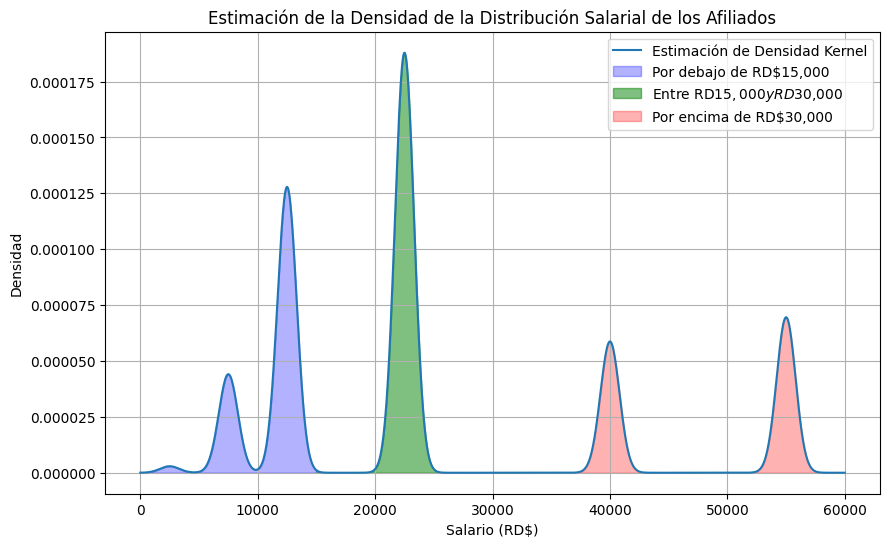

Probabilidad de que un salario esté por debajo de RD$15,000: 35.59%
Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: 38.30%
Probabilidad de que un salario esté por encima de RD$30,000: 26.12%
Probabilidad de que un salario esté por debajo de RD$30,000: 73.88%
Salario medio esperado: RD$25126.04
Aporte esperado por persona: RD$2545.27
Aporte total esperado de los no afiliados: RD$1616479141.53


In [4]:


# Definimos los puntos medios de los rangos salariales y la población correspondiente a cada rango.
# Estos valores son extraídos de la imagen que el usuario subió previamente.
salary_ranges_midpoints = np.array([2500, 7500, 12500, 22500, 40000, 55000])
population_per_range = np.array([13172, 199255, 577944, 849295, 265327, 314346])

# Creamos una muestra ponderada para la estimación de la densidad kernel utilizando los puntos medios
# y la población de cada rango.
sample = np.repeat(salary_ranges_midpoints, population_per_range)


# Generar muestra ponderada para KDE
sample = np.repeat(salary_ranges_midpoints, population_per_range)


kde = gaussian_kde(sample)

# Rango de valores salariales para calcular la densidad
salary_values = np.linspace(0, 60000, 1000)
density = kde(salary_values)

# Calcular probabilidades para diferentes rangos salariales
prob_below_15k = kde.integrate_box_1d(0, 15000)
prob_15k_to_30k = kde.integrate_box_1d(15000, 30000)
prob_above_30k = kde.integrate_box_1d(30000, salary_values[-1])
prob_below_30k = prob_below_15k + prob_15k_to_30k

# Calcular el salario medio esperado
expected_salary = (salary_values * density).sum() / density.sum()

# Población no afiliada
pop_no_afiliada = 635092

# Calcular el aporte esperado por persona (10.13% del salario medio)
expected_contribution_per_person = expected_salary * 0.1013

# Calcular el aporte total esperado de los no afiliados
total_expected_contribution = expected_contribution_per_person * pop_no_afiliada

# Visualizar la distribución y áreas de interés
plt.figure(figsize=(10, 6))
plt.plot(salary_values, density, label='Estimación de Densidad Kernel')
plt.fill_between(salary_values, density, where=(salary_values <= 15000), color='blue', alpha=0.3, label='Por debajo de RD$15,000')
plt.fill_between(salary_values, density, where=(salary_values > 15000) & (salary_values <= 30000), color='green', alpha=0.5, label='Entre RD$15,000 y RD$30,000')
plt.fill_between(salary_values, density, where=(salary_values > 30000), color='red', alpha=0.3, label='Por encima de RD$30,000')
plt.title('Estimación de la Densidad de la Distribución Salarial de los Afiliados')
plt.xlabel('Salario (RD$)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las probabilidades y el aporte esperado
print(f"Probabilidad de que un salario esté por debajo de RD$15,000: {prob_below_15k:.2%}")
print(f"Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: {prob_15k_to_30k:.2%}")
print(f"Probabilidad de que un salario esté por encima de RD$30,000: {prob_above_30k:.2%}")
print(f"Probabilidad de que un salario esté por debajo de RD$30,000: {prob_below_30k:.2%}")
print(f"Salario medio esperado: RD${expected_salary:.2f}")
print(f"Aporte esperado por persona: RD${expected_contribution_per_person:.2f}")
print(f"Aporte total esperado de los no afiliados: RD${total_expected_contribution:.2f}")
